In [1]:
import quantecon as qe
import numpy as np
import matplotlib.pyplot as plt

# **Introduction**

In the previous lecture, we learned how to solve an optimal savings problem using the **Tauchen method** and **value function iteration**. In this problem, the consumer takes interest rates and income as exogenous and optimally decides their consumption and savings. 

A key feature of this model is the presence of two state variables: wealth and income. Wealth evolves endogenously, determined by the consumer's intertemporal budget constraint, while income follows an $AR(1)$ process approximated by a Markov chain. By modeling and solving this problem, we have equipped ourselves with the mathematical tools needed to solve the basic model of government default.

In this lecture, we will focus on a specific optimal savings model, **Arellano (2008)**. This model considers a unique type of consumer — the government. The government can either buy or sell one-period foreign bonds (savings or borrowing) in international capital markets. Each period, in addition to deciding optimal savings, the government faces a special choice: **default or not**:
- If the government chooses to repay its debt, it can continue issuing bonds in the next period to hedge against income shocks.
- If the government chooses to default, it clears its debt but faces a low probability of re-entering the international capital market in the future.

In this setting, the price of government bonds (the inverse of the interest rate) becomes an endogenous variable, determined by the exogenous international capital market interest rate and an endogenous **risk premium**, which is shaped by foreign creditors' expectations of default.

This model helps us understand the mechanisms behind several stylized facts about sovereign default, such as:
- The countercyclical nature of government bond interest rates
- Countercyclical international trade balances
- High volatility of consumption relative to output

In addition, the government’s decision to default is primarily driven by income fluctuations. When hit by a negative income shock, the government has an incentive to default. In the event of a default, the following outcomes occur:
- Spikes in interest rates
- Temporary loss of access to international credit markets
- Large drops in output, consumption, and welfare
- Significant capital outflows during recessions

These phenomena are captured within the model.


# **Overview of the model**


## **Output and Consumption**

- **Output**:  
  The small open economy is endowed with an exogenous stochastic process $ \{y_t\} $.

  Output is realized only in periods when the government repays its sovereign debt.

  The sequence $ \{y_t\} $ follows a Markov process with a state transition probability matrix $ Q(y, y') $.

- **Consumption**:  
  Domestic households are identical and make optimal consumption decisions according to

  <a id='equation-equation13-1'></a>
  $$
  \mathbb{E} \sum_{t=0}^{\infty} \beta^t u(c_t) \tag{1} \\
  u(c) \equiv \frac{c^{1-\gamma}}{1-\gamma}
  $$

  **Assumptions related to consumption**:  
  - Consumption is affected by the government's decision to borrow or lend internationally.
  - The government is benevolent and aims to maximize [(1)](#equation-equation13-1).
  - The government is the sole actor with access to foreign credit.
  - Since households are averse to consumption fluctuations, the government seeks to smooth consumption by borrowing from or lending to foreign creditors.

  Based on these assumptions, we can treat the households and the government as a single agent.


## **Foreign Bond**

**Assumptions on Foreign Bond:**  
- The bond matures in one period and is not state-contingent.
- Purchasing a bond with face value $ B' $ represents a claim to $ B' $ units of the consumption good in the next period.
- To purchase $ B' $ for the next period, the cost is $ q B' $ today.
- Selling $ -B' $ units of next period's goods earns $ - q B' $ units of today's goods.
  - If $ B' < 0 $, then $ -q B' $ units of the good are received in the current period, with a promise to repay $ -B' $ units in the next period.
  - There is an equilibrium price function $ q(B', y) $ that depends on both $ B' $ and $ y $.
- To prevent Ponzi schemes, we impose the constraint $ B \geq -Z $ for some $Z>0$ in every period.

The earnings on the government's portfolio are distributed (or, if negative, taxed) lump sum to households.

When the government is not excluded from financial markets, the one-period foreign budget constraint is:

<a id='equation-equation13-2'></a>
$$
c + q(B', y) B' = y + B  \tag{2}
$$


## **Foreign creditors**

**Assumptions on foreign creditors:**  
- risk neutral  
- know the domestic output stochastic process $ \{y_t\} $ and observe
  $ y_t, y_{t-1}, \ldots, $ at time $ t $  
- can borrow or lend without limit in an international credit market
  at a constant international interest rate $ r $  
- receive full payment if the government chooses to pay  
- receive zero if the government defaults 


When a government is expected to default next period with probability $ \delta $, the expected
value of a promise to pay one unit of consumption next period is $ 1 - \delta $.

Therefore, the **zero-profit condition** of foreign creditors is


<a id='equation-equation13-3'></a>
$$
qB' = \delta * \frac{0}{1+r} + (1-\delta)\frac{B'}{1+r} \\ 
q = \frac{1 - \delta}{1 + r} \tag{3}
$$

Next we see how the the default probability $ \delta $ depends on government decisions.

## **Government’s Decisions**

At each point in time $ t $, the government chooses between:  

1. defaulting, declining to repay all of its current debt.
1. Repaying one-period debt, and purchasing or selling an optimal quantity
  of one-period sovereign debt  

**Consequences of sovereign default**:
1. Output immediately falls from $ y $ to $ h(y) $, where $ 0 \leq h(y) \leq y $.  
1. The country loses access to foreign credit markets.  
1. While in a state of default, the economy regains access to foreign credit in each subsequent period with probability $ \theta $.

## **Equilibrium**

Informally, an equilibrium is a sequence of interest rates on its sovereign debt, a stochastic
sequence of government default decisions and an implied flow of household consumption such that

- Consumption and assets satisfy the national budget constraint.  
- The government maximizes household utility considering:  
  - effect of default choice on the price of bonds  
  - consequences of defaulting now for future net output and future borrowing/lending opportunities  

- The interest rate includes a risk-premium sufficient to make foreign
  creditors expect on average to earn the constant risk-free international interest rate.  


To express these ideas more precisely, consider first the choices of the government, which

1. enters a period with initial assets $ B $, or what is the same thing,
  initial debt to be repaid now of $ -B $  
1. observes current output $ y $, and  
1. chooses either  
1. to default, or  
1. to pay $ -B $ and set next period’s debt due to $ -B' $  


**Recursive Formulation:**

- state variables for the government comprise the pair $ (B, y) $  
- $ v(B, y) $ is the optimum value of the government’s problem when
  at the beginning of a period it faces the choice of whether to honor or default  
- $ v_c(B, y) $ is the value of choosing to pay obligations falling due  
- $ v_d(y) $ is the value of choosing to default  

  $ v_d(y) $ does not depend on $ B $ because, when access to credit is eventually regained, sovergin debt equal $ 0 $.

Expressed recursively, the **value of defaulting** is

$$
v_d(y) = u(h(y)) +
            \beta \int \left\{
            \theta v(0, y') + (1 - \theta) v_d(y')
            \right\}
            p(y, y') dy'
\\
where \quad h(y) \equiv min\{h\mathbb{E}(y),y\}, h\in (0,1)
$$

The **value of repaying** is

$$
v_c(B, y) = \max_{B' \geq -Z}
       \left\{
            u(y - q(B', y) B' + B) +
            \beta \int v(B', y') p(y, y') dy'
      \right\}
$$

The **three value functions are linked** by

$$
v(B, y) = \max\{ v_c(B, y), v_d(y) \}
$$

The government chooses to default when

$$
v_c(B, y) < v_d(y)
$$

and hence given $ B' $ the **probability of default next period** is


<a id='equation-equation13-4'></a>
$$
\delta(B', y) := \int \mathbb 1\{v_c(B', y') < v_d(y') \} p(y, y') dy' \tag{4}
$$

Given zero profits for foreign creditors in equilibrium, we can combine
[(3)](#equation-equation13-3) and [(4)](#equation-equation13-4) to pin down the **bond price function**:


<a id='equation-equation13-5'></a>
$$
q(B', y) = \frac{1 - \delta(B', y)}{1 + r} \tag{5}
$$

### **Definition of Equilibrium**

An **equilibrium** is

- a pricing function $ q(B',y) $,  
- a triple of value functions $ (v_c(B, y), v_d(y), v(B,y)) $,  
- a decision rule telling the government when to default and when to pay as
  a function of the state $ (B, y) $, and  
- an asset accumulation rule that, conditional on choosing not to default,
  maps $ (B,y) $ into $ B' $  


such that

- The three Bellman equations for $ (v_c(B, y), v_d(y), v(B,y)) $ are satisfied  
- Given the price function $ q(B',y) $, the default decision rule and the asset
  accumulation decision rule attain the optimal value function  $ v(B,y) $  
- The price function $ q(B',y) $ satisfies equation [(5)](#equation-equation13-5)  

# **Computation**

Let’s now compute an equilibrium of Arellano’s model.

The equilibrium objects are the value function $ v(B, y) $, the associated
default decision rule, and the pricing function $ q(B', y) $.

**Algorithm:**  
1. Guess a pair of non-default and default value functions $ v_c(B,y) $ and $ v_d(y) $.  
1. Using these functions, calculate the value function $ v(B,y) $, the corresponding default probabilities and the price function $ q(B,y) $.  
1. At each pair $ (B, y) $,  
1. update the value of defaulting $ v_d(y) $.  
1. update the value of remaining $ v_c(B, y) $.  
1. Check for convergence. If converged, stop – if not, go to step 2.  

We use simple discretization on a grid of asset holdings and income levels.

The output process is discretized using **Tauchen method**.

### 1. Inputs

The following function contains default parameters and returns tuples that
contain the key computational components of the model.

In [2]:
# utility function
def u(c,γ):
    return c**(1-γ)/(1-γ)

# Setting of model
def create_arellano(B_size=251,       # Grid size for bonds
    B_min=-0.45,        # Smallest B value
    B_max=0.45,         # Largest B value
    y_size=51,          # Grid size for income
    β=0.953,            # Time discount parameter
    γ=2.0,              # Utility parameter
    r=0.017,            # Lending rate
    ρ=0.945,            # Persistence in the income process
    η=0.025,            # Standard deviation of the income process
    θ=0.282,            # Prob of re-entering financial markets
    def_y_param=0.969): # Parameter governing income in default

    # Set up grids
    B_grid = np.linspace(B_min, B_max, B_size)
    mc = qe.markov.tauchen(y_size, ρ, η)
    
    y_grid = np.exp(mc.state_values)
    P = mc.P

    # Output when default, with same shape as y_grid
    y_def = np.minimum(def_y_param * np.mean(y_grid), y_grid)
    
    params = β, γ, r, ρ, η, θ
    sizes = B_size, y_size
    arrays = P, B_grid, y_grid, y_def
    
    return params,sizes,arrays,mc

model = create_arellano()

## 2. Define Bond Prices, Bellman equation and operators

**We use a vectorized approach.**

The first step is to creat a function to compute the bond price at each state, given $v_c(B,y) $ and $v_d(y)$.

$$
\delta(B', y) := \int \mathbb 1\{v_c(B', y') < v_d(y') \} p(y, y') dy'
$$

$$
q(B', y) = \frac{1 - \delta(B', y)}{1 + r}
$$



In [3]:
def get_q(model,v_c,v_d):
    """
    Compute the bond price function q(B, y) at each (B, y) pair.  
    The first step is to calculate the default probabilities

        δ(B, y) := Σ_{y'} 1{v_c(B, y') < v_d(y')} P(y, y') dy'
    
    Next:
        q(B,y) := (1-δ)/(1+r)
    """
        
    # Unpack the model
    params, sizes, arrays, _= model
    β, γ, r, ρ, η, θ = params
    B_size, y_size = sizes
    P, B_grid, y_grid, y_def = arrays

    # calculate δ(i_B,i_y)
    v_c = np.reshape(v_c,(B_size,1,y_size))    #v_c[i_B,i_yp] -> v_c[i_B,i_y,i_yp]
    v_d = np.reshape(v_d,(1,1,y_size))         #v_d[i_yp] -> v_d[i_B,i_y,i_yp]
    P = np.reshape(P,(1,y_size,y_size))        # P[i_y,i_yp] -> P[i_B,i_y,i_yp]
    
    default_states = v_c < v_d
    δ = np.sum(default_states*P, axis=(2,))    #sum over y'
    q = (1-δ)/(1+r)

    return q


Next we introduce Bellman operators that updated $ v_d $:
$$
v_d(y) = u(h(y)) +
            \beta \int \left\{
            \theta v(0, y') + (1 - \theta) v_d(y')
            \right\}
            p(y, y') dy'
\\
where \quad h(y) \equiv min\{h\mathbb{E}(y),y\}, h\in (0,1)
$$

$$
v(0, y) = \max\{ v_c(0, y'), v_d(y') \}
$$



In [4]:
def T_d(model,v_c,v_d):
    """
    The RHS of the Bellman equation when income is at index y_idx and
    the country has chosen to default.  Returns an update of v_d.
    """
    
    # Unpack the model
    params, sizes, arrays, _= model
    β, γ, r, ρ, η, θ = params
    B_size, y_size = sizes
    P, B_grid, y_grid, y_def = arrays

    B0_idx = np.searchsorted(B_grid, 1e-10) # Index at which B is near zero
    
    v0 = np.maximum(v_c[B0_idx,:],v_d)      # value of v(0,y')
    temp = θ * v0 + (1-θ)* v_d              # part of v_d's second term, temp[i_yp]
    W = np.reshape(temp,(1,y_size))          # temp[i_yp] -> W[i_y,i_yp]
    second_term = β * np.sum(W*P,axis=(1,)) # calculate the expectation on RHS

    current_utility = u(y_def, γ)
    
    return current_utility + second_term


The Bellman operator for $v_c$ is given by:
$$
v_c(B, y) = \max_{B' \geq -Z}
       \left\{
            u\left(y - q(B', y) B' + B\right) +
            \beta \int v(B', y') p(y, y') dy'
      \right\}
$$

We can split this operation into two steps. First, we calculate the expression inside the maximization, and then solve for $v_c$:
$$
Bellman(B, y, B') \equiv
      u\left(\underbrace{y - q(B', y) B' + B}_{c}\right) +
      \beta \int v(B', y') p(y, y') dy'
$$


In [5]:
def Bellman(model,v_c,v_d,q):
    """
    The RHS of the Bellman equation (without max) when the country is not in a
    defaulted state on their debt.  That is,

        bellman(B, y, B') =
            u(y - q(B', y) B' + B) + β Σ_{y'} v(B', y') P(y, y')

    If consumption is not positive then returns -np.inf
    """

    # Unpack the model
    params, sizes, arrays, _= model
    β, γ, r, ρ, η, θ = params
    B_size, y_size = sizes
    P, B_grid, y_grid, y_def = arrays

    # Calculate the consumption matrix c(B,y,B') given all possible B,y,B'
    y_idx = np.reshape(np.arange(y_size), (1, y_size, 1))       # y[i_y] -> y[i_B,i_y,i_Bp]
    B_idx = np.reshape(np.arange(B_size), (B_size, 1, 1))       # B[i_B] -> B[i_B,i_y,i_Bp]
    Bp_idx = np.reshape(np.arange(B_size), (1, 1, B_size))      # B'[i_Bp] -> B'[i_B,i_y,i_Bp]
    
    c = y_grid[y_idx] - q[Bp_idx, y_idx] * B_grid[Bp_idx] + B_grid[B_idx] 


    # Set up v[i_B, i_y, i_Bp, i_yp] and P[i_B, i_y, i_Bp, i_yp]
    v_d = np.reshape(v_d, (1, 1, 1, y_size))
    v_c = np.reshape(v_c, (1, 1, B_size, y_size))
    v = np.maximum(v_c, v_d)
    P = np.reshape(P, (1, y_size, 1, y_size))

    Ev = np.sum(v*P,axis=(3,))

    # Return new_v_c beforemax Bellman[i_B, i_y, i_Bp]
    val = np.where(c > 0, u(c, γ) + β * Ev, -np.inf)
    
    return val

Here are two functions we need for value function iteration.

1. **Bellman operator** `T_{c}`
2. computes a **$ v $-greedy policy given $ v_c $**  `get_greedy`  
    (i.e., the policy that maximizes the right-hand side of the Bellman equation.)

In [6]:
def T_c(model,v_c, v_d, q):
    vals = Bellman(model,v_c, v_d, q)
    return np.max(vals, axis=2)

In [7]:
def get_greedy(model,v_c, v_d, q):
    vals = Bellman(model, v_c, v_d, q)
    return np.argmax(vals, axis=2)

## 3. Value Function Iteration

In [8]:
def VFI(model, tol=1e-8, max_iter=10_000):
    """
    Given an instance of `ArellanoEconomy`, this function computes the optimal
    policy and value functions.
    """

    # Unpack the model
    _, sizes, _, _= model
    B_size, y_size = sizes
 
    # Initial conditions for v_c and v_d
    v_c = np.zeros((B_size, y_size))
    v_d = np.zeros((y_size,))

    current_iter = 0
    error = tol + 1
    while (current_iter < max_iter) and (error > tol):
        if current_iter % 100 == 0:
            print(f"Entering iteration {current_iter} with error {error}.")

        q = get_q(model, v_c, v_d)
        new_v_d = T_d(model, v_c, v_d)
        new_v_c = T_c(model, v_c, v_d, q)

        error = np.max(np.abs(new_v_c - v_c)) + np.max(np.abs(new_v_d - v_d))
        v_c, v_d = new_v_c, new_v_d
        current_iter += 1

    print(f"Terminating at iteration {current_iter}.")

    q = get_q(model, v_c, v_d)
    B_star = get_greedy(model, v_c, v_d, q)
    v = np.maximum(v_c, np.reshape(v_d, (1, y_size)))

    return v_c, v_d, v, q, B_star

## 4. Get Value and Policy Function

In [9]:
model = create_arellano()

# unpack the model
params, sizes, arrays, y_mc= model
β, γ, r, ρ, η, θ = params
B_size, y_size = sizes
P, B_grid, y_grid, y_def = arrays

# value function iteration
v_c, v_d, v, q, B_star = VFI(model, tol=1e-8, max_iter=10_000)

Entering iteration 0 with error 1.00000001.
Entering iteration 100 with error 0.017499341639204857.
Entering iteration 200 with error 0.00014189363559680146.
Entering iteration 300 with error 1.1514679698620967e-06.
Terminating at iteration 399.


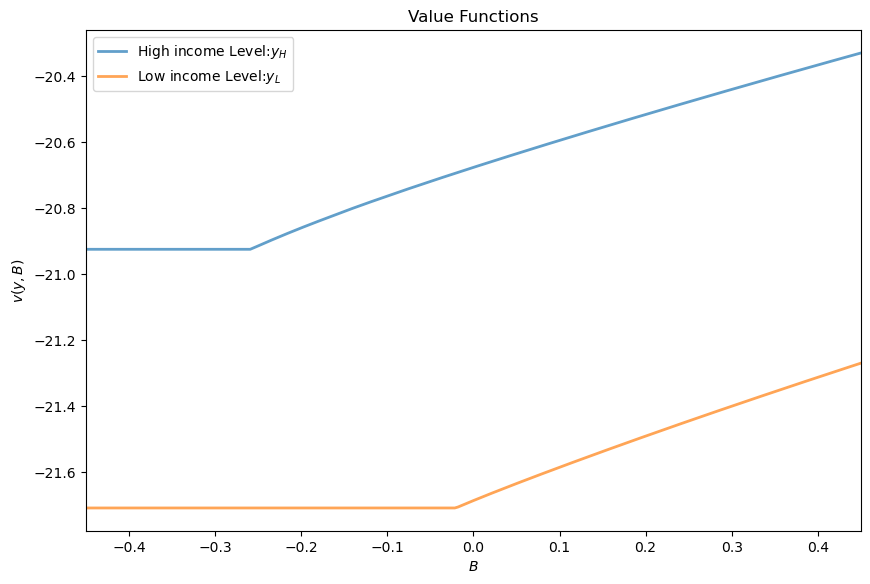

In [10]:
# Create "Y High" and "Y Low" values as 5% devs from mean
high, low = np.mean(y_grid) * 1.05, np.mean(y_grid) * .95
iy_high, iy_low = (np.searchsorted(y_grid, x) for x in (high, low))

# Plot the value function in defferent level of income
fig, ax = plt.subplots(figsize=(10, 6.5))
ax.set_title("Value Functions")
ax.plot(B_grid, v[:, iy_high], label="High income Level:$y_H$", lw=2, alpha=0.7)
ax.plot(B_grid, v[:, iy_low], label="Low income Level:$y_L$", lw=2, alpha=0.7)
ax.legend(loc='upper left')
ax.set(xlabel="$B$", ylabel="$v(y, B)$")
ax.set_xlim(min(B_grid), max(B_grid))
plt.show()

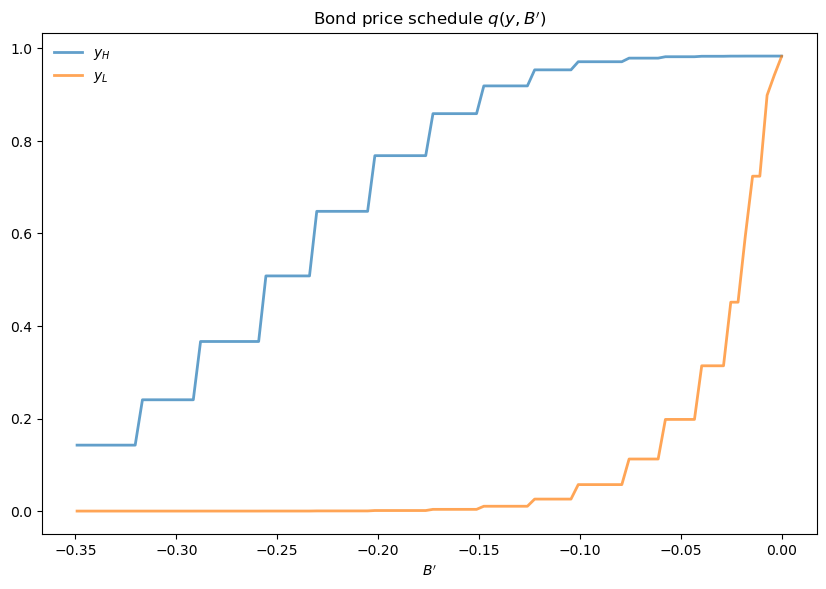

In [11]:
fig, ax = plt.subplots(figsize=(10, 6.5))
ax.set_title("Bond price schedule $q(y, B')$")

# Extract a suitable plot grid
x = []
q_low = []
q_high = []
for i, B in enumerate(B_grid):
    if -0.35 <= B <= 0:  # To match fig 3 of Arellano (2008)
        x.append(B)
        q_low.append(q[i, iy_low])
        q_high.append(q[i, iy_high])
ax.plot(x, q_high, label="$y_H$", lw=2, alpha=0.7)
ax.plot(x, q_low, label="$y_L$", lw=2, alpha=0.7)
ax.set_xlabel("$B'$")
ax.legend(loc='upper left', frameon=False)
plt.show()

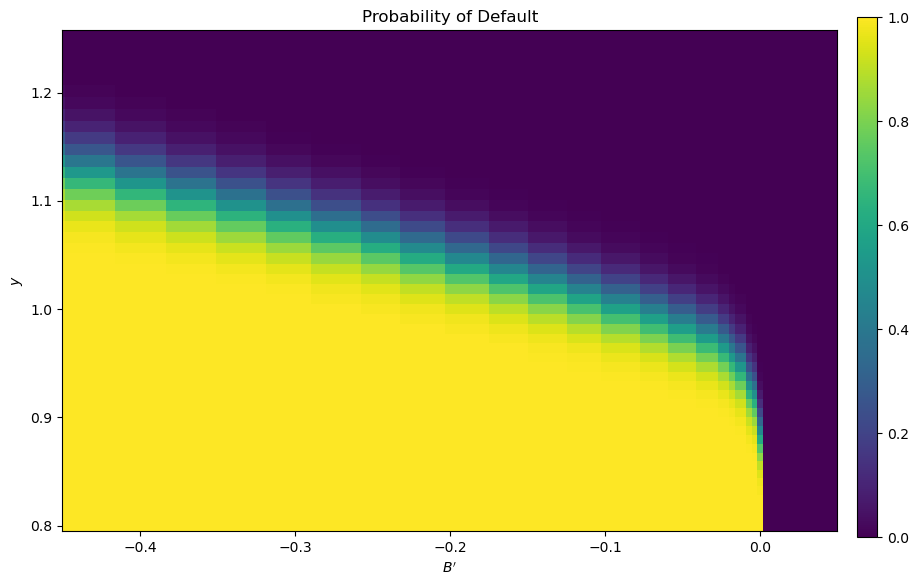

In [12]:
# Set up arrays with indices [i_B, i_y, i_yp]
shaped_v_d = np.reshape(v_d, (1, 1, y_size))
shaped_v_c = np.reshape(v_c, (B_size, 1, y_size))
shaped_P = np.reshape(P, (1, y_size, y_size))

# Compute delta[i_B, i_y]
default_states = 1.0 * (shaped_v_c < shaped_v_d)
delta = np.sum(default_states * shaped_P, axis=(2,))

# Create figure
fig, ax = plt.subplots(figsize=(10, 6.5))
hm = ax.pcolormesh(B_grid, y_grid, delta.T)
cax = fig.add_axes([.92, .1, .02, .8])
fig.colorbar(hm, cax=cax)
ax.axis([B_grid.min(), 0.05, y_grid.min(), y_grid.max()])
ax.set(xlabel="$B'$", ylabel="$y$", title="Probability of Default")
plt.show()

## 5. Time Series Simulation

In [13]:
def simulate(model, T, v_c, v_d, q, B_star, seed=1234):
    """
    Simulates the Arellano 2008 model of sovereign debt

    Here `model` is an instance of `create_arellano` and `T` is the length of
    the simulation.  
    
    Endogenous objects `v_c`, `v_d`, `q` and `B_star` comes 
    from a solution to `model`.

    """
    # unpack the model
    params, sizes, arrays, y_mc= model
    β, γ, r, ρ, η, θ = params
    B_size, y_size = sizes
    P, B_grid, y_grid, y_def = arrays
    
    # Set seed of random number generator
    rng = np.random.default_rng(seed)

    B0_idx = np.searchsorted(B_grid, 1e-10)  # Index at which B is near zero

    # Set initial conditions
    y_idx = y_size // 2
    B_idx = B0_idx
    in_default = False

    # Create Markov chain and simulate income process
    y_sim_indices = y_mc.simulate_indices(T+1, init=y_idx)

    # Allocate memory for outputs
    y_sim = np.empty(T)
    y_a_sim = np.empty(T)
    B_sim = np.empty(T)
    q_sim = np.empty(T)
    d_sim = np.empty(T, dtype=int)

    # Perform simulation
    t = 0
    while t < T:

        # Update y_sim and B_sim
        y_sim[t] = y_grid[y_idx]
        B_sim[t] = B_grid[B_idx]

        # if in default:
        if v_c[B_idx, y_idx] < v_d[y_idx] or in_default:
            # Update y_a_sim
            y_a_sim[t] = y_def[y_idx]
            d_sim[t] = 1
            Bp_idx = B0_idx
            # Re-enter financial markets next period with prob θ
            in_default = False if rng.uniform(0,1) < θ else True
        else:
            # Update y_a_sim
            y_a_sim[t] = y_sim[t]
            d_sim[t] = 0
            Bp_idx = B_star[B_idx, y_idx]

        q_sim[t] = q[Bp_idx, y_idx]

        # Update time and indices
        t += 1
        y_idx = y_sim_indices[t]
        B_idx = Bp_idx

    return y_sim, y_a_sim, B_sim, q_sim, d_sim

Let's apply the simulation function

In [14]:
T = 250
y_sim, y_a_sim, B_sim, q_sim, d_sim = simulate(model, T, v_c, v_d, q, B_star)

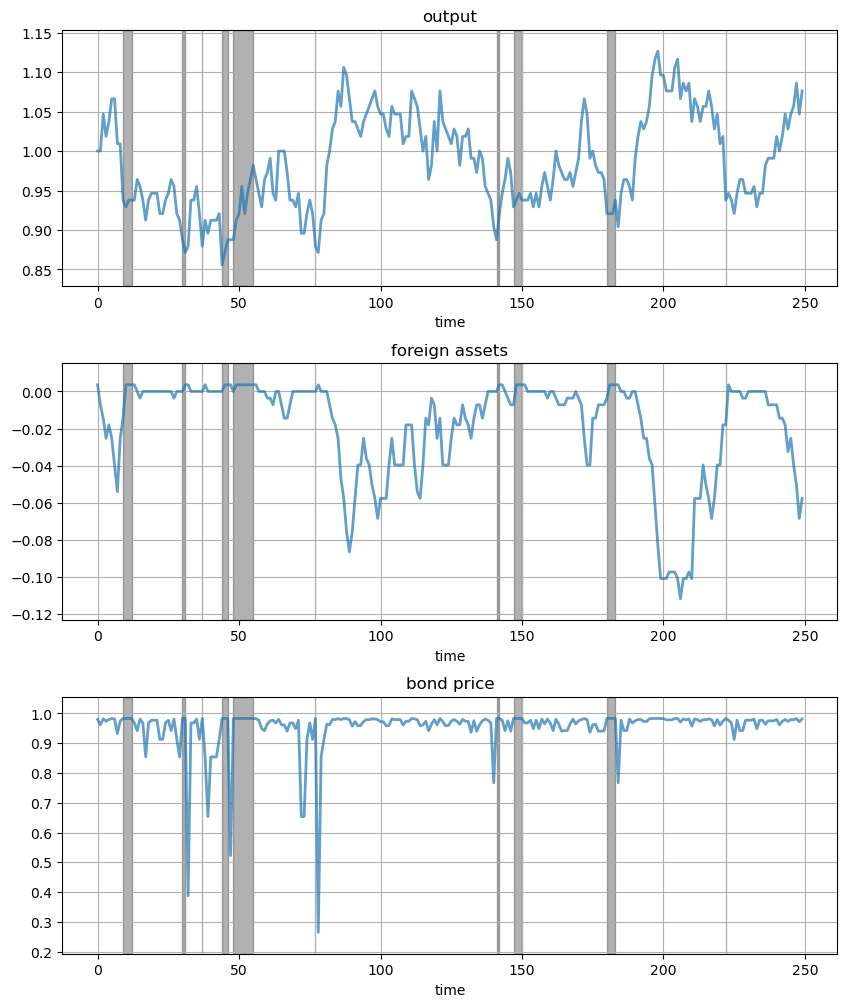

In [15]:
# Pick up default start and end dates
start_end_pairs = []
i = 0
while i < len(d_sim):
    if d_sim[i] == 0:
        i += 1
    else:
        # If we get to here we're in default
        start_default = i
        while i < len(d_sim) and d_sim[i] == 1:
            i += 1
        end_default = i - 1
        start_end_pairs.append((start_default, end_default))


# plot simulated series
plot_series = (y_sim, B_sim, q_sim)
titles = 'output', 'foreign assets', 'bond price'

fig, axes = plt.subplots(len(plot_series), 1, figsize=(10, 12))
fig.subplots_adjust(hspace=0.3)

for ax, series, title in zip(axes, plot_series, titles):
    # Determine suitable y limits
    s_max, s_min = max(series), min(series)
    s_range = s_max - s_min
    y_max = s_max + s_range * 0.1
    y_min = s_min - s_range * 0.1
    ax.set_ylim(y_min, y_max)
    for pair in start_end_pairs:
        ax.fill_between(pair, (y_min, y_min), (y_max, y_max),
                        color='k', alpha=0.3)
    ax.grid()
    ax.plot(range(T), series, lw=2, alpha=0.7)
    ax.set(title=title, xlabel="time")

plt.show()
